# Sixth
batch size 2048 lr 1e-3 swish mult2, filtered HL features

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = filtered_features_0
classModel = 'modelSwish'
varSet = "filtered_features_0"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 2048, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 29 features: ['ntracks', 'ntowers', 'jetMass', 'jetPt', 'max_track_pT', 'max_track_eta', 'min_track_eta', 'sum_tower_Ehad', 'max_tower_E', 'sum_track_pT', 'mean_tower_Eem', 'mean_track_pT', 'tower_Eem_frac', 'min_track_pT', 'sum_tower_Eem', 'min_tower_E', 'jetPhi', 'sum_tower_E', 'min_tower_eta', 'tower_Ehad_frac', 'max_tower_Eem', 'mean_tower_E', 'max_tower_Ehad', 'max_tower_eta', 'mean_tower_eta', 'jetEta', 'mean_tower_Ehad', 'mean_track_eta', 'min_tower_Eem']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'testing.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 2.013s 


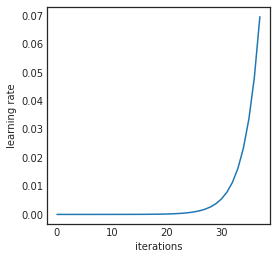

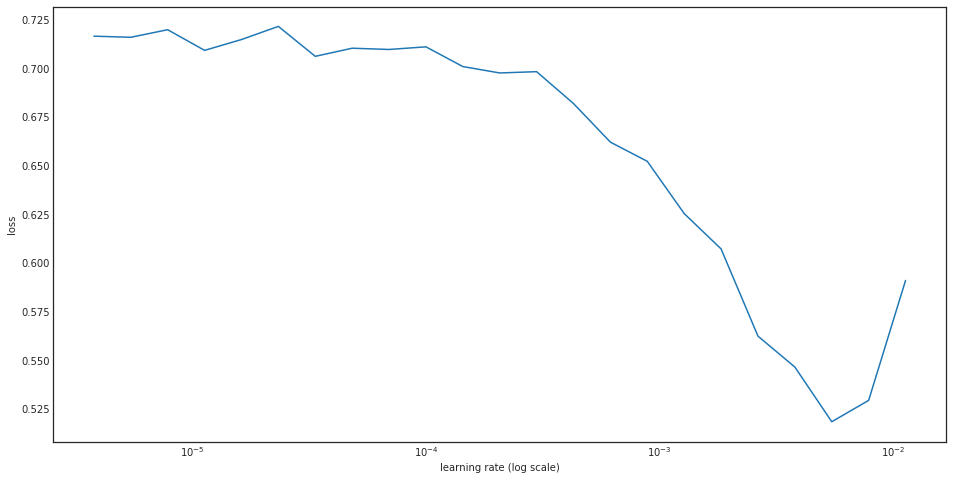

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-7,1e-1], trainOnWeights=False, verbose=0)

In [5]:
compileArgs['lr'] = 5e-2

## Train classifier

Using cosine annealing
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.508108724461
2 New best found: 0.489794467668
3 New best found: 0.48635823451
4 New best found: 0.485745368498
5 New best found: 0.484333938217
6 New best found: 0.483275204111
7 New best found: 0.482808863489
12 New best found: 0.482301944019
14 New best found: 0.482161963763
15 New best found: 0.481994632412
25 New best found: 0.481635074103
27 New best found: 0.481581351159
29 New best found: 0.481316633211
30 New best found: 0.481174811606
31 New best found: 0.481172331273
54 New best found: 0.481048114653
57 New best found: 0.480970660153
58 New best found: 0.480875951349
59 New best found: 0.480838762661
60 New best found: 0.480748042703
61 New best found: 0.480708388922
62 New best found: 0.480659841285
63 New best found: 0.480647975321
Early stopping after 103 epochs
Score is: {'loss': 0.4806479753212906, 'AUC': 0.20351015079544887}
Fold took 333.441s

Running fold 2 / 10
1 N

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107544). Check your callbacks.
  % delta_t_median)


1 New best found: 0.510449359555
2 New best found: 0.490473657784
3 New best found: 0.488030129685
5 New best found: 0.487668305255
6 New best found: 0.485156817651
7 New best found: 0.484625486657
12 New best found: 0.484306957871
13 New best found: 0.48427043892
14 New best found: 0.483963710018
15 New best found: 0.483529316218
25 New best found: 0.48288658329
28 New best found: 0.482736589141
29 New best found: 0.482653647364
55 New best found: 0.482409076518
57 New best found: 0.482382551153
58 New best found: 0.482348058599
59 New best found: 0.482239614547
60 New best found: 0.482228524658
61 New best found: 0.482194754834
62 New best found: 0.482172659383
Early stopping after 102 epochs
Score is: {'loss': 0.4821726593832468, 'AUC': 0.2052423747778891}
Fold took 286.210s

Running fold 6 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.127032). Check your callbacks.
  % delta_t_median)


1 New best found: 0.4968510523
2 New best found: 0.489010550083
3 New best found: 0.484859029217
6 New best found: 0.482852924577
7 New best found: 0.482734936181
12 New best found: 0.482646192202
14 New best found: 0.48170070964
15 New best found: 0.48157031193
28 New best found: 0.48101851764
30 New best found: 0.480914547389
31 New best found: 0.480862898872
58 New best found: 0.480826184362
59 New best found: 0.480767322354
60 New best found: 0.480737811725
61 New best found: 0.480640907777
62 New best found: 0.480630129608
63 New best found: 0.480619886964
Early stopping after 103 epochs
Score is: {'loss': 0.48061988696352154, 'AUC': 0.20364342190192797}
Fold took 294.787s

Running fold 7 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137799). Check your callbacks.
  % delta_t_median)


1 New best found: 0.517536125392
2 New best found: 0.493384614644
3 New best found: 0.487517206019
5 New best found: 0.485171798899
6 New best found: 0.484545924615
7 New best found: 0.483631811532
11 New best found: 0.483066513184
14 New best found: 0.482508328837
15 New best found: 0.482438553069
26 New best found: 0.482246132255
27 New best found: 0.482045463125
29 New best found: 0.481914041795
30 New best found: 0.481742396537
58 New best found: 0.481695458765
61 New best found: 0.481604278227
62 New best found: 0.48154561219
Early stopping after 102 epochs
Score is: {'loss': 0.4815456121901997, 'AUC': 0.2044152910856949}
Fold took 291.533s

Running fold 8 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.150385). Check your callbacks.
  % delta_t_median)


1 New best found: 0.493466481038
2 New best found: 0.488502489597
3 New best found: 0.485825284595
6 New best found: 0.484898406383
7 New best found: 0.483974036434
13 New best found: 0.483675711192
14 New best found: 0.483365853579
15 New best found: 0.4832407414
26 New best found: 0.482862996363
27 New best found: 0.482780415653
28 New best found: 0.482702028343
29 New best found: 0.482483451093
30 New best found: 0.482472091457
31 New best found: 0.482446160894
Early stopping after 71 epochs
Score is: {'loss': 0.4824461608940197, 'AUC': 0.2053736742913297}
Fold took 206.770s

Running fold 9 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.169977). Check your callbacks.
  % delta_t_median)


1 New best found: 0.497370070684
2 New best found: 0.487749177462
3 New best found: 0.485281280531
6 New best found: 0.484290760594
7 New best found: 0.483373754343
12 New best found: 0.482764739256
13 New best found: 0.482481353055
14 New best found: 0.4823657649
15 New best found: 0.482283015881
27 New best found: 0.482205113437
28 New best found: 0.481939721507
29 New best found: 0.481865740671
30 New best found: 0.481673785319
31 New best found: 0.481660790577
54 New best found: 0.481643012541
55 New best found: 0.481503700735
56 New best found: 0.481481542094
57 New best found: 0.481329284893
60 New best found: 0.481274784502
62 New best found: 0.481260283252
63 New best found: 0.481257392175
Early stopping after 103 epochs
Score is: {'loss': 0.4812573921754315, 'AUC': 0.20414868780204443}
Fold took 336.409s

Running fold 10 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.213701). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.107193). Check your callbacks.
  % delta_t_median)


1 New best found: 0.503859543158
2 New best found: 0.493472086394
3 New best found: 0.488027867976
6 New best found: 0.485879809764
7 New best found: 0.485453787435
12 New best found: 0.48515906744
13 New best found: 0.48491667556
14 New best found: 0.484638906194
15 New best found: 0.484313197661
27 New best found: 0.484204450618
28 New best found: 0.484144574257
29 New best found: 0.483988117795
30 New best found: 0.483932013679
31 New best found: 0.483920985897
52 New best found: 0.483836540649
54 New best found: 0.483581479179
56 New best found: 0.483524337029
58 New best found: 0.483166229308
61 New best found: 0.483139162487
Early stopping after 101 epochs
Score is: {'loss': 0.4831391624874641, 'AUC': 0.20619949695624784}
Fold took 300.353s


______________________________________
Training finished
Cross-validation took 2879.915s 


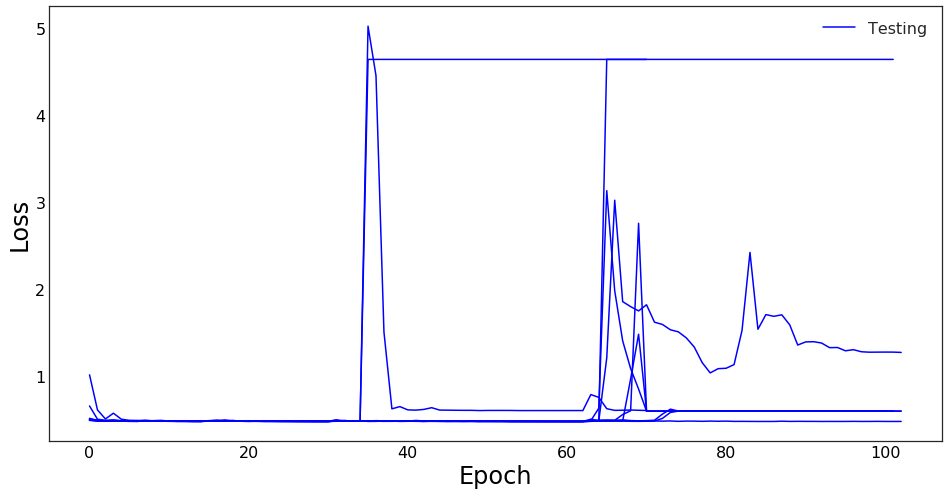

Mean AUC = 0.2049 +- 0.0003
______________________________________



In [7]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=40, cosAnnealMult=2, trainOnWeights=False, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [8]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [9]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 0.48061988696352154
Model 1 is 0 with loss = 0.4806479753212906
Model 2 is 3 with loss = 0.48124131055586067
Model 3 is 8 with loss = 0.4812573921754315
Model 4 is 6 with loss = 0.4815456121901997
Model 5 is 4 with loss = 0.4821726593832468
Model 6 is 7 with loss = 0.4824461608940197
Model 7 is 2 with loss = 0.48256393182216895
Model 8 is 9 with loss = 0.4831391624874641
Model 9 is 1 with loss = 0.48375256248171805


## Response on development data

In [10]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, nFolds=nSplits, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00027647373635s per sample

Predicting batch 2 out of 10
Prediction took 0.000225652599146s per sample

Predicting batch 3 out of 10
Prediction took 0.000242570327808s per sample

Predicting batch 4 out of 10
Prediction took 0.000238585861055s per sample

Predicting batch 5 out of 10
Prediction took 0.000237541044392s per sample

Predicting batch 6 out of 10
Prediction took 0.000238193072743s per sample

Predicting batch 7 out of 10
Prediction took 0.000235975737774s per sample

Predicting batch 8 out of 10
Prediction took 0.00024584343141s per sample

Predicting batch 9 out of 10
Prediction took 0.000239974059653s per sample

Predicting batch 10 out of 10
Prediction took 0.00024010223895s per sample



In [11]:
print 'Training ROC AUC {}'.format(roc_auc_score(getFeature('targets', trainData, nSplits), getFeature('pred', trainData, nSplits)))

Training ROC AUC 0.79615706997


## Response on val data

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, nFolds=nSplits, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000231603074768s per sample

Predicting batch 2 out of 10
Prediction took 0.000227719150865s per sample

Predicting batch 3 out of 10
Prediction took 0.000224370164912s per sample

Predicting batch 4 out of 10
Prediction took 0.000225877355744s per sample

Predicting batch 5 out of 10
Prediction took 0.000249738727611s per sample

Predicting batch 6 out of 10
Prediction took 0.000236228856055s per sample

Predicting batch 7 out of 10
Prediction took 0.000261499886992s per sample

Predicting batch 8 out of 10
Prediction took 0.000260251883491s per sample

Predicting batch 9 out of 10
Prediction took 0.000236076364289s per sample

Predicting batch 10 out of 10
Prediction took 0.000232099007619s per sample



In [13]:
print 'Testing ROC AUC: {}'.format(roc_auc_score(getFeature('targets', valData, nSplits), getFeature('pred', valData, nSplits)))

Testing ROC AUC: 0.792439632705


## Evaluation

### Import in dataframe

In [14]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [15]:
valData = convertToDF(valData, nLoad=nSplits)

313510 candidates loaded


In [16]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

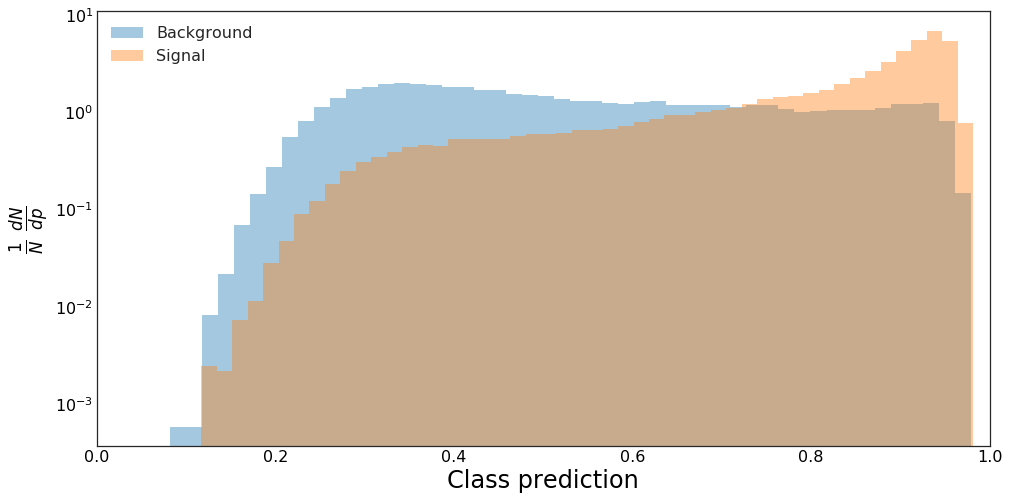

In [17]:
getClassPredPlot([valData[bkgVal], valData[sigVal]])